# CNN Architectures - InceptionV3, InceptionResNetV2, ResNet101V2 for Plant Disease Detection trained on Plant Village Dataset

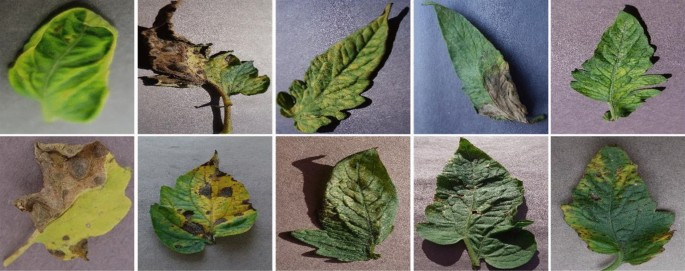

Importing Libraries

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping

Loading and Pre - processing data

In [30]:
train_directory = '/kaggle/input/plant-village/train_directory'
test_directory = '/kaggle/input/plant-village/test_directory'
validation_directory = '/kaggle/input/plant-village/validation_directory'


batch_size = 32
image_size = (224, 224)


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,

)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

batch_size = 32
image_size = (224, 224)

# Training Data Generator
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

validation_generator = validation_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

# Test Data Generator
test_generator = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

Found 39333 images belonging to 39 classes.
Found 9846 images belonging to 39 classes.
Found 12307 images belonging to 39 classes.


In [31]:
class_names = train_generator.class_indices

# Convert the dictionary to a list of class labels
class_labels = list(class_names.keys())

# Print or use class_labels as needed
print(class_labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl

In [37]:
num_classes = train_generator.num_classes

InceptionResNet V2

In [44]:
from tensorflow.keras.applications import InceptionResNetV2

base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model2 = Model(inputs=base_model.input, outputs=predictions)


219055592/219055592 [==============================] - 2s 0us/step


In [45]:
model2.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [46]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history = model2.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)


Epoch 1/20
1230/1230 [==============================] - 246s 147ms/step - loss: 0.9848 - accuracy: 0.7043 - val_loss: 0.4341 - val_accuracy: 0.8631
Epoch 2/20
1230/1230 [==============================] - 168s 137ms/step - loss: 0.5674 - accuracy: 0.8162 - val_loss: 0.3383 - val_accuracy: 0.8853
Epoch 3/20
1230/1230 [==============================] - 168s 137ms/step - loss: 0.4899 - accuracy: 0.8402 - val_loss: 0.2957 - val_accuracy: 0.9028
Epoch 4/20
1230/1230 [==============================] - 168s 136ms/step - loss: 0.4419 - accuracy: 0.8531 - val_loss: 0.2804 - val_accuracy: 0.9088
Epoch 5/20
1230/1230 [==============================] - 168s 136ms/step - loss: 0.4194 - accuracy: 0.8612 - val_loss: 0.2663 - val_accuracy: 0.9099
Epoch 6/20
1230/1230 [==============================] - 167s 136ms/step - loss: 0.3938 - accuracy: 0.8681 - val_loss: 0.2444 - val_accuracy: 0.9186
Epoch 7/20
1230/1230 [==============================] - 166s 135ms/step - loss: 0.3793 - accuracy: 0.8745 - val_

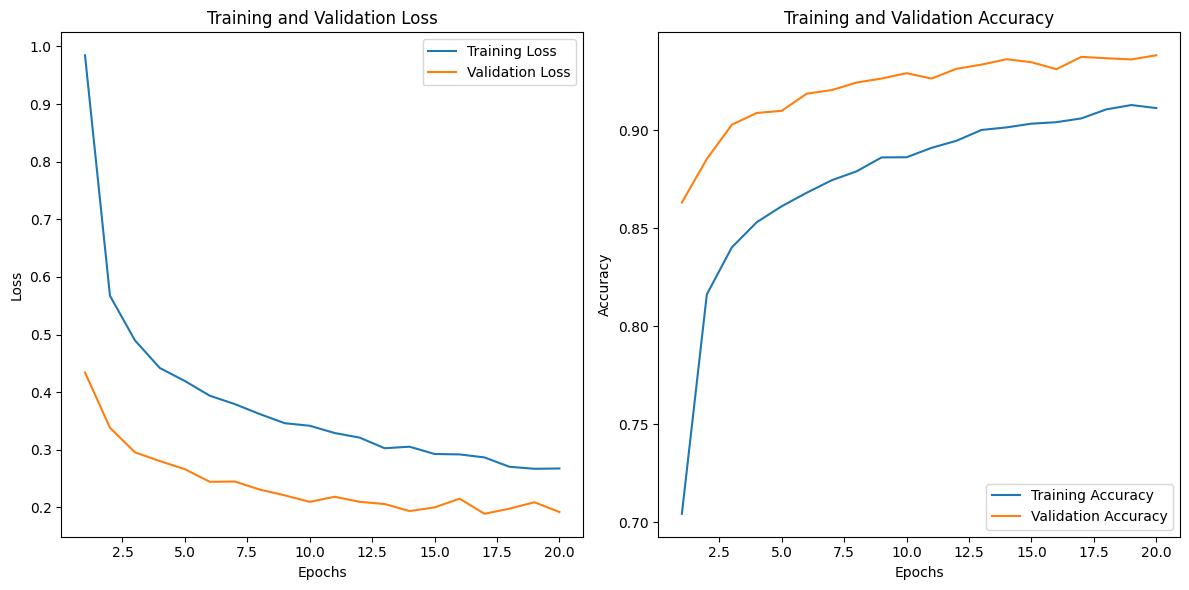

In [47]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
model2.save('/kaggle/working/plant_village_InceptionResNetV2_kaggle.h5')

In [49]:

test_loss, test_accuracy = model2.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

385/385 [==============================] - 48s 125ms/step - loss: 0.1984 - accuracy: 0.9335
Test Loss: 0.1984
Test Accuracy: 0.9335


InceptionV3

In [50]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model3 = Model(inputs=base_model.input, outputs=predictions)


87910968/87910968 [==============================] - 1s 0us/step


In [51]:
model3.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [54]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history = model3.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)


Epoch 1/20
1230/1230 [==============================] - 120s 97ms/step - loss: 0.7226 - accuracy: 0.7739 - val_loss: 0.4293 - val_accuracy: 0.8647
Epoch 2/20
1230/1230 [==============================] - 121s 99ms/step - loss: 0.5516 - accuracy: 0.8239 - val_loss: 0.3851 - val_accuracy: 0.8736
Epoch 3/20
1230/1230 [==============================] - 125s 101ms/step - loss: 0.4903 - accuracy: 0.8401 - val_loss: 0.3233 - val_accuracy: 0.8970
Epoch 4/20
1230/1230 [==============================] - 119s 97ms/step - loss: 0.4442 - accuracy: 0.8544 - val_loss: 0.3092 - val_accuracy: 0.8979
Epoch 5/20
1230/1230 [==============================] - 127s 103ms/step - loss: 0.4266 - accuracy: 0.8619 - val_loss: 0.3171 - val_accuracy: 0.8967
Epoch 6/20
1230/1230 [==============================] - 121s 98ms/step - loss: 0.4002 - accuracy: 0.8680 - val_loss: 0.2946 - val_accuracy: 0.9024
Epoch 7/20
1230/1230 [==============================] - 119s 97ms/step - loss: 0.3790 - accuracy: 0.8769 - val_loss:

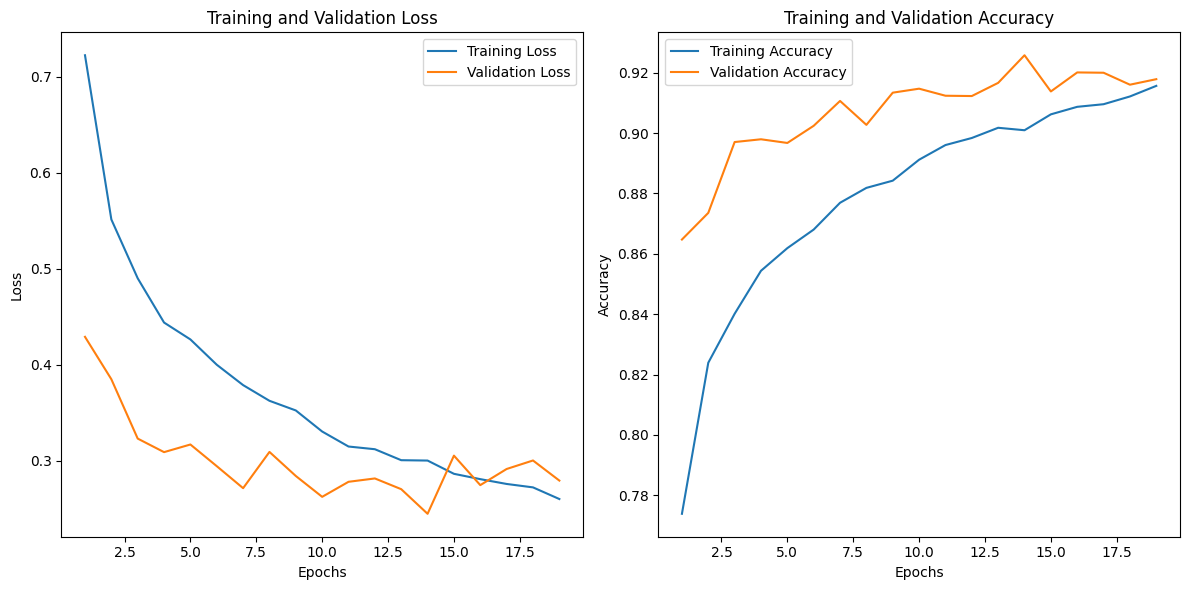

In [55]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
model3.save('/kaggle/working/plant_village_InceptionV3_kaggle.h5')

In [57]:

test_loss, test_accuracy = model3.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

385/385 [==============================] - 42s 108ms/step - loss: 0.2344 - accuracy: 0.9219
Test Loss: 0.2344
Test Accuracy: 0.9219


ResNet101 V2

In [58]:
from tensorflow.keras.applications import ResNet101V2

base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(224,224,3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model6 = Model(inputs=base_model.input, outputs=predictions)


171317808/171317808 [==============================] - 1s 0us/step


In [59]:
model6.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [60]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history = model6.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)


Epoch 1/20
1230/1230 [==============================] - 158s 123ms/step - loss: 0.5923 - accuracy: 0.8221 - val_loss: 0.2340 - val_accuracy: 0.9226
Epoch 2/20
1230/1230 [==============================] - 149s 121ms/step - loss: 0.3094 - accuracy: 0.8979 - val_loss: 0.1965 - val_accuracy: 0.9356
Epoch 3/20
1230/1230 [==============================] - 148s 120ms/step - loss: 0.2641 - accuracy: 0.9137 - val_loss: 0.1630 - val_accuracy: 0.9478
Epoch 4/20
1230/1230 [==============================] - 148s 120ms/step - loss: 0.2312 - accuracy: 0.9260 - val_loss: 0.1703 - val_accuracy: 0.9476
Epoch 5/20
1230/1230 [==============================] - 149s 121ms/step - loss: 0.2122 - accuracy: 0.9326 - val_loss: 0.1621 - val_accuracy: 0.9461
Epoch 6/20
1230/1230 [==============================] - 150s 122ms/step - loss: 0.1981 - accuracy: 0.9363 - val_loss: 0.1481 - val_accuracy: 0.9535
Epoch 7/20
1230/1230 [==============================] - 149s 121ms/step - loss: 0.1974 - accuracy: 0.9384 - val_

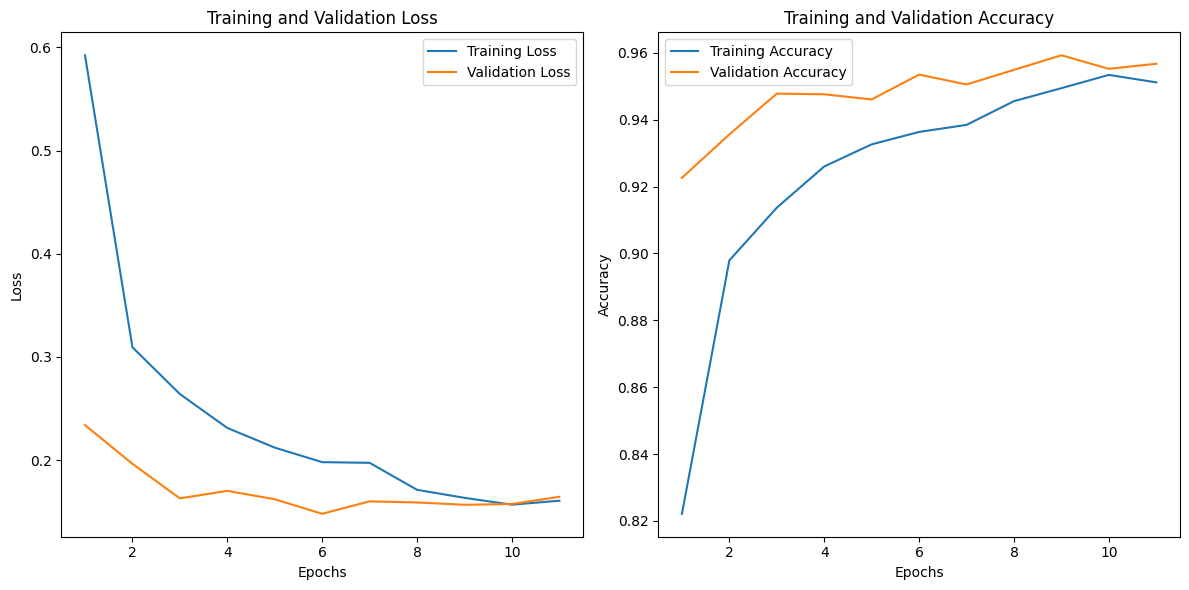

In [61]:


# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
model6.save('/kaggle/working/plant_village_ResNet101V2_kaggle.h5')

In [63]:

test_loss, test_accuracy = model6.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

385/385 [==============================] - 47s 122ms/step - loss: 0.1554 - accuracy: 0.9524
Test Loss: 0.1554
Test Accuracy: 0.9524
